### Quick look at Reduced HIRES Spectra


In [2]:
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data_dir = "../../data/"
f1 = 'ij130.2075.fits' # red
f2 = 'rj130.2075.fits' # middle
f3 = 'bj130.2075.fits' # blue
f_iwav = data_dir+'keck_iwav.fits'
f_rwav = data_dir+'keck_rwav.fits'
f_bwav = data_dir+'keck_bwav.fits'

# j130.2075 is an observation of Barnard's star, a nearby M-dwarf. 

# These wavelength solutions are the same size as the data files and have a one-to-one correspondence
#   The wavelengths are taken in the observatory rest frame. Stars may have their spectral lines 
#   shifted in the wavelength direction due to system velocity (Radial Velocity relative to us)
#   and from barycentric velocities as calculated at the time of observation.

In [4]:
# Open files using astropy
print(data_dir+f1)
hdul = fits.open(data_dir+f1)
data1 = hdul[0].data
head1 = hdul[0].header
hdul_wav=fits.open(f_iwav)
iwav = hdul_wav[0].data

hdul = fits.open(data_dir+f2)
data2 = hdul[0].data
head2 = hdul[0].header
hdul_wav=fits.open(f_rwav)
rwav = hdul_wav[0].data

hdul = fits.open(data_dir+f3)
data3 = hdul[0].data
head3 = hdul[0].header
hdul_wav=fits.open(f_bwav)
bwav = hdul_wav[0].data

hdul.info()

../../data/ij130.2075.fits
Filename: ../../data/bj130.2075.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     722   (4021, 23)   float32   


In [5]:
print(repr(hdul[0].header))

SIMPLE  =                    T / Written by IDL:  Tue Aug 23 09:01:26 2011      
BITPIX  =                  -32 / IEEE single precision floating point           
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4021 /Number of positions along axis 1                
NAXIS2  =                   23 /Number of positions along axis 2                
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                    0 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
DATE    = '2011-08-23T06:26:58' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
COMMENT BEGIN observation-specific keywords written by write_image              
COMMENT BEGIN keywords that 

(10, 4021)

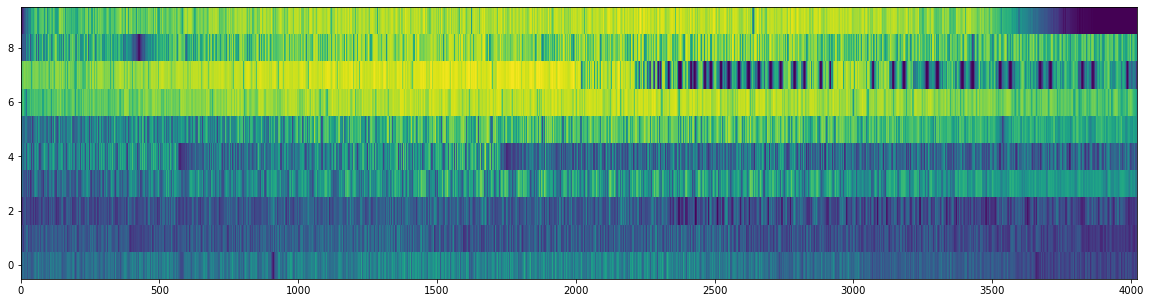

In [6]:
# Open the Red chip.
data1.shape
plt.figure(figsize=(20,5))
plt.autoscale(enable=True,axis='both')
plt.imshow(data1,origin = 'lower',aspect = 'auto',interpolation = 'nearest')
data1.shape

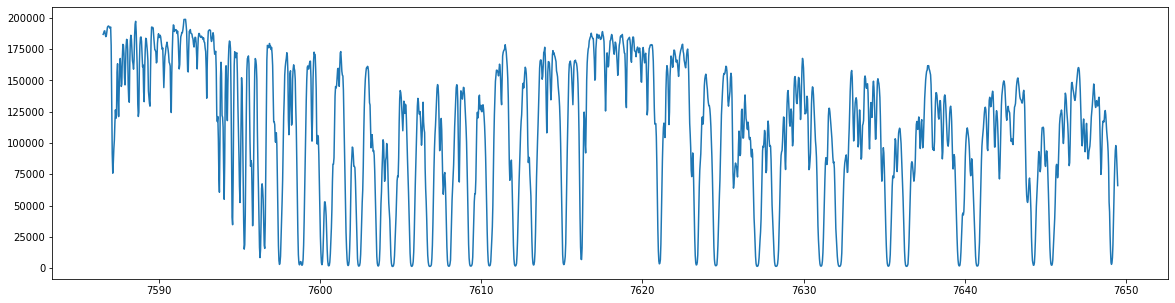

In [15]:
# Plot the H-alpha line

plt.figure(figsize=(20,5))
ord=7
p1=2000
p2=4000
plt.plot(iwav[ord,p1:p2],data1[ord,p1:p2])


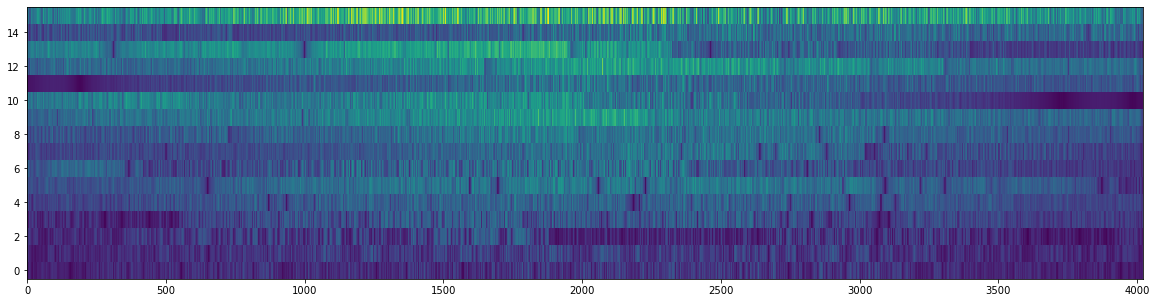

In [33]:
# Plot the middle chip
plt.figure(figsize=(20,5))
plt.autoscale(enable=True,axis='both')
plt.imshow(data2,origin = 'lower',aspect = 'auto',interpolation = 'nearest')

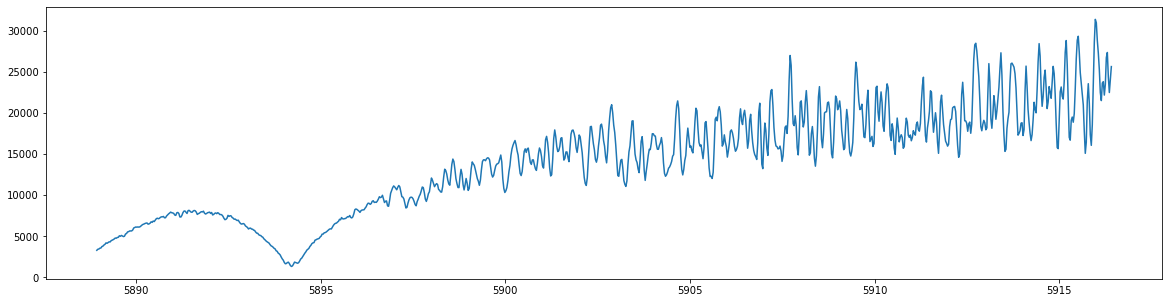

In [34]:
# Plot the Na D lines in the middle chip
ord =11
w1=5890
w2=6000

plt.figure(figsize=(20,5))
plt.plot(rwav[ord,0:1000],data2[ord,0:1000])
# plt.plot(rwav[ord,3000:4000],data2[ord,3000:4000]) # Also in order 10


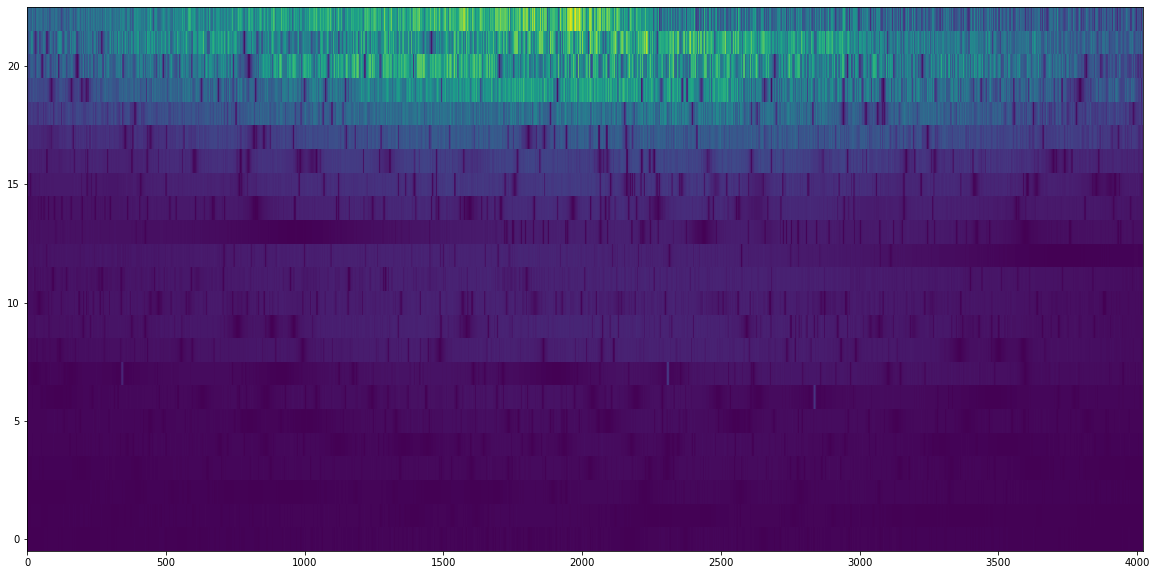

In [35]:
# Plot the blue chip
plt.figure(figsize=(20,10))
plt.autoscale(enable=True,axis='both')
plt.imshow(data3,origin = 'lower',aspect = 'auto',interpolation = 'nearest')

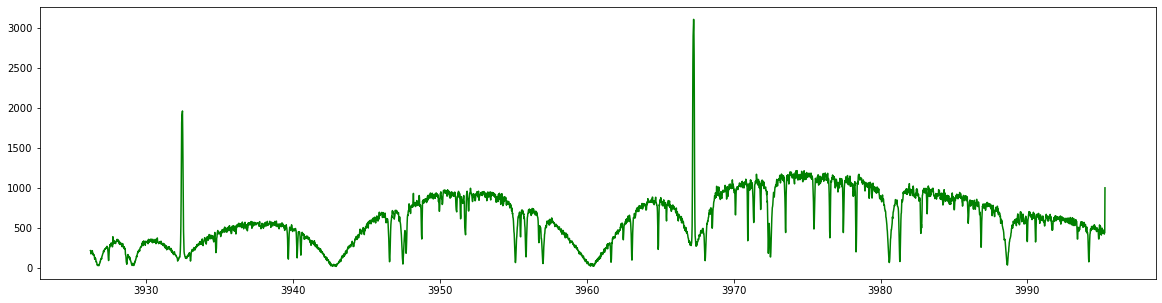

In [36]:
# Plot the Ca II H&K lines in the blue chip
ord =7
plt.figure(figsize=(20,5))
plt.plot(bwav[ord,:],data3[ord,:],'g-')
